# After July 26 - Friday meeting with Douglas

# p-values to select best set of parameters

1. Event log - L1 (WITHOUT ’admission’ and ’discharge’), L2 (WITH ’ad-
mission’ and ’discharge’)
2. Noise threshold - 0.2 / 0.3 / 0.4
3. Fitness threshold - 0.5 / 0.6 / 0.7

success code to run - plot LOS / Thrombotic events / Mortality - for all 18 attempts as sub figures on a one large figure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os
from scipy.stats import mannwhitneyu
import numpy as np

In [2]:
# Define your attempts with their respective file paths
attempts = [
#1
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.5/cluster_distribution_LogV1_Noise0.2_Fitness0.5.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.5/clusters_hadm_id_level_LogV1_Noise0.2_Fitness0.5.csv'},
#2   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.5/cluster_distribution_LogV2_Noise0.2_Fitness0.5.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.5/clusters_hadm_id_level_LogV2_Noise0.2_Fitness0.5.csv'},
#3    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.6/cluster_distribution_LogV1_Noise0.2_Fitness0.6.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.6/clusters_hadm_id_level_LogV1_Noise0.2_Fitness0.6.csv'},
    
# new
    
#17   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.6/cluster_distribution_LogV2_Noise0.2_Fitness0.6.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.2_fitness0.6/clusters_hadm_id_level_LogV2_Noise0.2_Fitness0.6.csv'},
    
    
#4    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise02_fitness07/cluster_distribution_EventLogV1_noise02_fitness07.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise02_fitness07/clusters_hadm_id_level_EventLogV1_noise02_fitness07.csv'},

# new
    
#18    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise02_fitness07/cluster_distribution_EventLogV2_noise02_fitness07.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise02_fitness07/clusters_hadm_id_level_EventLogV2_noise02_fitness07.csv'},
    
#5    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.5/cluster_distribution_LogV1_Noise0.3_Fitness0.5.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.5/clusters_hadm_id_level_LogV1_Noise0.3_Fitness0.5.csv'},
    
#6   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.5/cluster_distribution_LogV2_Noise0.3_Fitness0.5.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.5/clusters_hadm_id_level_LogV2_Noise0.3_Fitness0.5.csv'},
    
#7    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.6/cluster_distribution_LogV1_Noise0.3_Fitness0.6.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.6/clusters_hadm_id_level_LogV1_Noise0.3_Fitness0.6.csv'},
    
#8    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.6/cluster_distribution_LogV2_Noise0.3_Fitness0.6.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.6/clusters_hadm_id_level_LogV2_Noise0.3_Fitness0.6.csv'},
    
#9    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.7/cluster_distribution_LogV1_Noise0.3_Fitness0.7.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.7/clusters_hadm_id_level_LogV1_Noise0.3_Fitness0.7.csv'},
    
#10   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.7/cluster_distribution_LogV2_Noise0.3_Fitness0.7.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.3_fitness0.7/clusters_hadm_id_level_LogV2_Noise0.3_Fitness0.7.csv'},
    
#11   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.5/cluster_distribution_LogV1_Noise0.4_Fitness0.5.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.5/clusters_hadm_id_level_LogV1_Noise0.4_Fitness0.5.csv'},
    
#12   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.5/cluster_distribution_LogV2_Noise0.4_Fitness0.5.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.5/clusters_hadm_id_level_LogV2_Noise0.4_Fitness0.5.csv'},
    
#13    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.6/cluster_distribution_LogV1_Noise0.4_Fitness0.6.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.6/clusters_hadm_id_level_LogV1_Noise0.4_Fitness0.6.csv'},
    
#14    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.6/cluster_distribution_LogV2_Noise0.4_Fitness0.6.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.6/clusters_hadm_id_level_LogV2_Noise0.4_Fitness0.6.csv'},
    
#15    
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.7/cluster_distribution_LogV1_Noise0.4_Fitness0.7.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.7/clusters_hadm_id_level_LogV1_Noise0.4_Fitness0.7.csv'},
    
#16   
    {'cluster_distribution': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.7/cluster_distribution_LogV2_Noise0.4_Fitness0.7.csv', 'clusters_in_hadmid_level': '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/EventLogV1_noise0.4_fitness0.7/clusters_hadm_id_level_LogV2_Noise0.4_Fitness0.7.csv'}

]

In [3]:
# Function to perform chi-squared test and determine significant clusters
def perform_chi_squared_test(cluster_distribution_df, overall_positive_ratio, overall_negative_ratio, TP_to_TN_ratio, alpha=0.05):
    chi_squared_results = []
    for _, row in cluster_distribution_df.iterrows():
        cluster_index = row['cluster_index']
        observed_TN = row['TN_count']
        observed_TP = row['TP_count']
        total_cluster_patients = row['patient_count']
        
         # Expected counts based on overall ratios
        
        expected_TN = overall_negative_ratio * total_cluster_patients
        expected_TP = overall_positive_ratio * total_cluster_patients
        
        observed = [observed_TN, observed_TP]
        expected = [expected_TN, expected_TP]
        
        # chi2_contingency expects frequencies in a 2x2 table format
        
        contingency_table = [observed, expected]
         
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        significant = p_value < alpha
        
        # first condition inside 'if' to overcome zero division error when observed_TN = 0
        
        majority_class = 'TP' if (observed_TN == 0 or observed_TP / observed_TN > TP_to_TN_ratio) else 'TN'
        significant_majority_class = f'True_{majority_class}' if significant else 'False'
        
        chi_squared_results.append({
            'cluster_index': int(cluster_index),
            'patient_count': int(total_cluster_patients),
            'TP_count': int(observed_TP),
            'TN_count': int(observed_TN),
            'TP_percentage': round((observed_TP / total_cluster_patients) * 100, 2),
            'TN_percentage': round((observed_TN / total_cluster_patients) * 100, 2),
            'chi2_statistic': round(chi2, 2),
            'p_value': round(p_value, 2),
            'significant': significant,
            'significant_majority_class': significant_majority_class
        })
        
    chi_squared_results_df = pd.DataFrame(chi_squared_results)
    
# remove clusters if it doesn't contain any TP or TN patient = means, the cluster only contains either FP, FN, or both FN and FP.
# comment this line, as our data set only contain TP and TN patients no
    
    #chi_squared_results_df = chi_squared_results_df[(chi_squared_results_df['TP_count'] != 0) | (chi_squared_results_df['TN_count'] != 0)]
    return chi_squared_results_df.reset_index(drop=True)

# Function to label OD and Non-OD patients
def label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_df):
    TN_and_TP_hadm_id_merge_with_cluster_info = pd.merge(clusters_in_hadmid_level_df, chi_squared_results_df, how='left', on='cluster_index')
    
    OD_patients_hadm_list = TN_and_TP_hadm_id_merge_with_cluster_info[(TN_and_TP_hadm_id_merge_with_cluster_info ['class']=='TP') & (TN_and_TP_hadm_id_merge_with_cluster_info['significant_majority_class']=='True_TN')]
    OD_patients_count = len(OD_patients_hadm_list)
    OD_patients_evets_list = pd.merge(OD_patients_hadm_list, event_log_df, how='left', on='hadm_id')
    OD_patients_evets_list['OD_or_Non_od'] = 'OD'
    OD_patients_count = len(OD_patients_hadm_list)
    
    Non_OD_patients_hadm_list = TN_and_TP_hadm_id_merge_with_cluster_info[(TN_and_TP_hadm_id_merge_with_cluster_info['class']=='TP') & (TN_and_TP_hadm_id_merge_with_cluster_info['significant_majority_class'] != 'True_TN')]
    Non_OD_patients_count = len(Non_OD_patients_hadm_list)
    Non_OD_patients_evets_list = pd.merge(Non_OD_patients_hadm_list, event_log_df, how='left', on='hadm_id')
    Non_OD_patients_evets_list['OD_or_Non_od'] = 'Non_OD'
    Non_OD_patients_count = len(Non_OD_patients_hadm_list)
    
    Event_log_TP_only_with_OD_and_Non_od_label = pd.concat([OD_patients_evets_list, Non_OD_patients_evets_list], axis=0)
    
    return (Event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count)


### 1. LoS

1
              count       mean        std      min        25%        50%  \
OD_or_Non_od                                                               
Non_OD        689.0  22.243166  20.343539  5.60000  10.642361  15.809028   
OD            364.0  17.951152  14.455834  5.59375   9.553993  13.778472   

                    75%         max  
OD_or_Non_od                         
Non_OD        26.852083  219.908333  
OD            21.801736  177.950694  
2
              count       mean        std       min        25%        50%  \
OD_or_Non_od                                                                
Non_OD        212.0  35.705618  27.383815  7.936806  19.515799  29.727431   
OD            841.0  16.991879  13.249448  5.593750   9.141667  13.336111   

                    75%         max  
OD_or_Non_od                         
Non_OD        43.239757  219.908333  
OD            20.061111  177.950694  
3
              count       mean        std      min        25%        50%  \


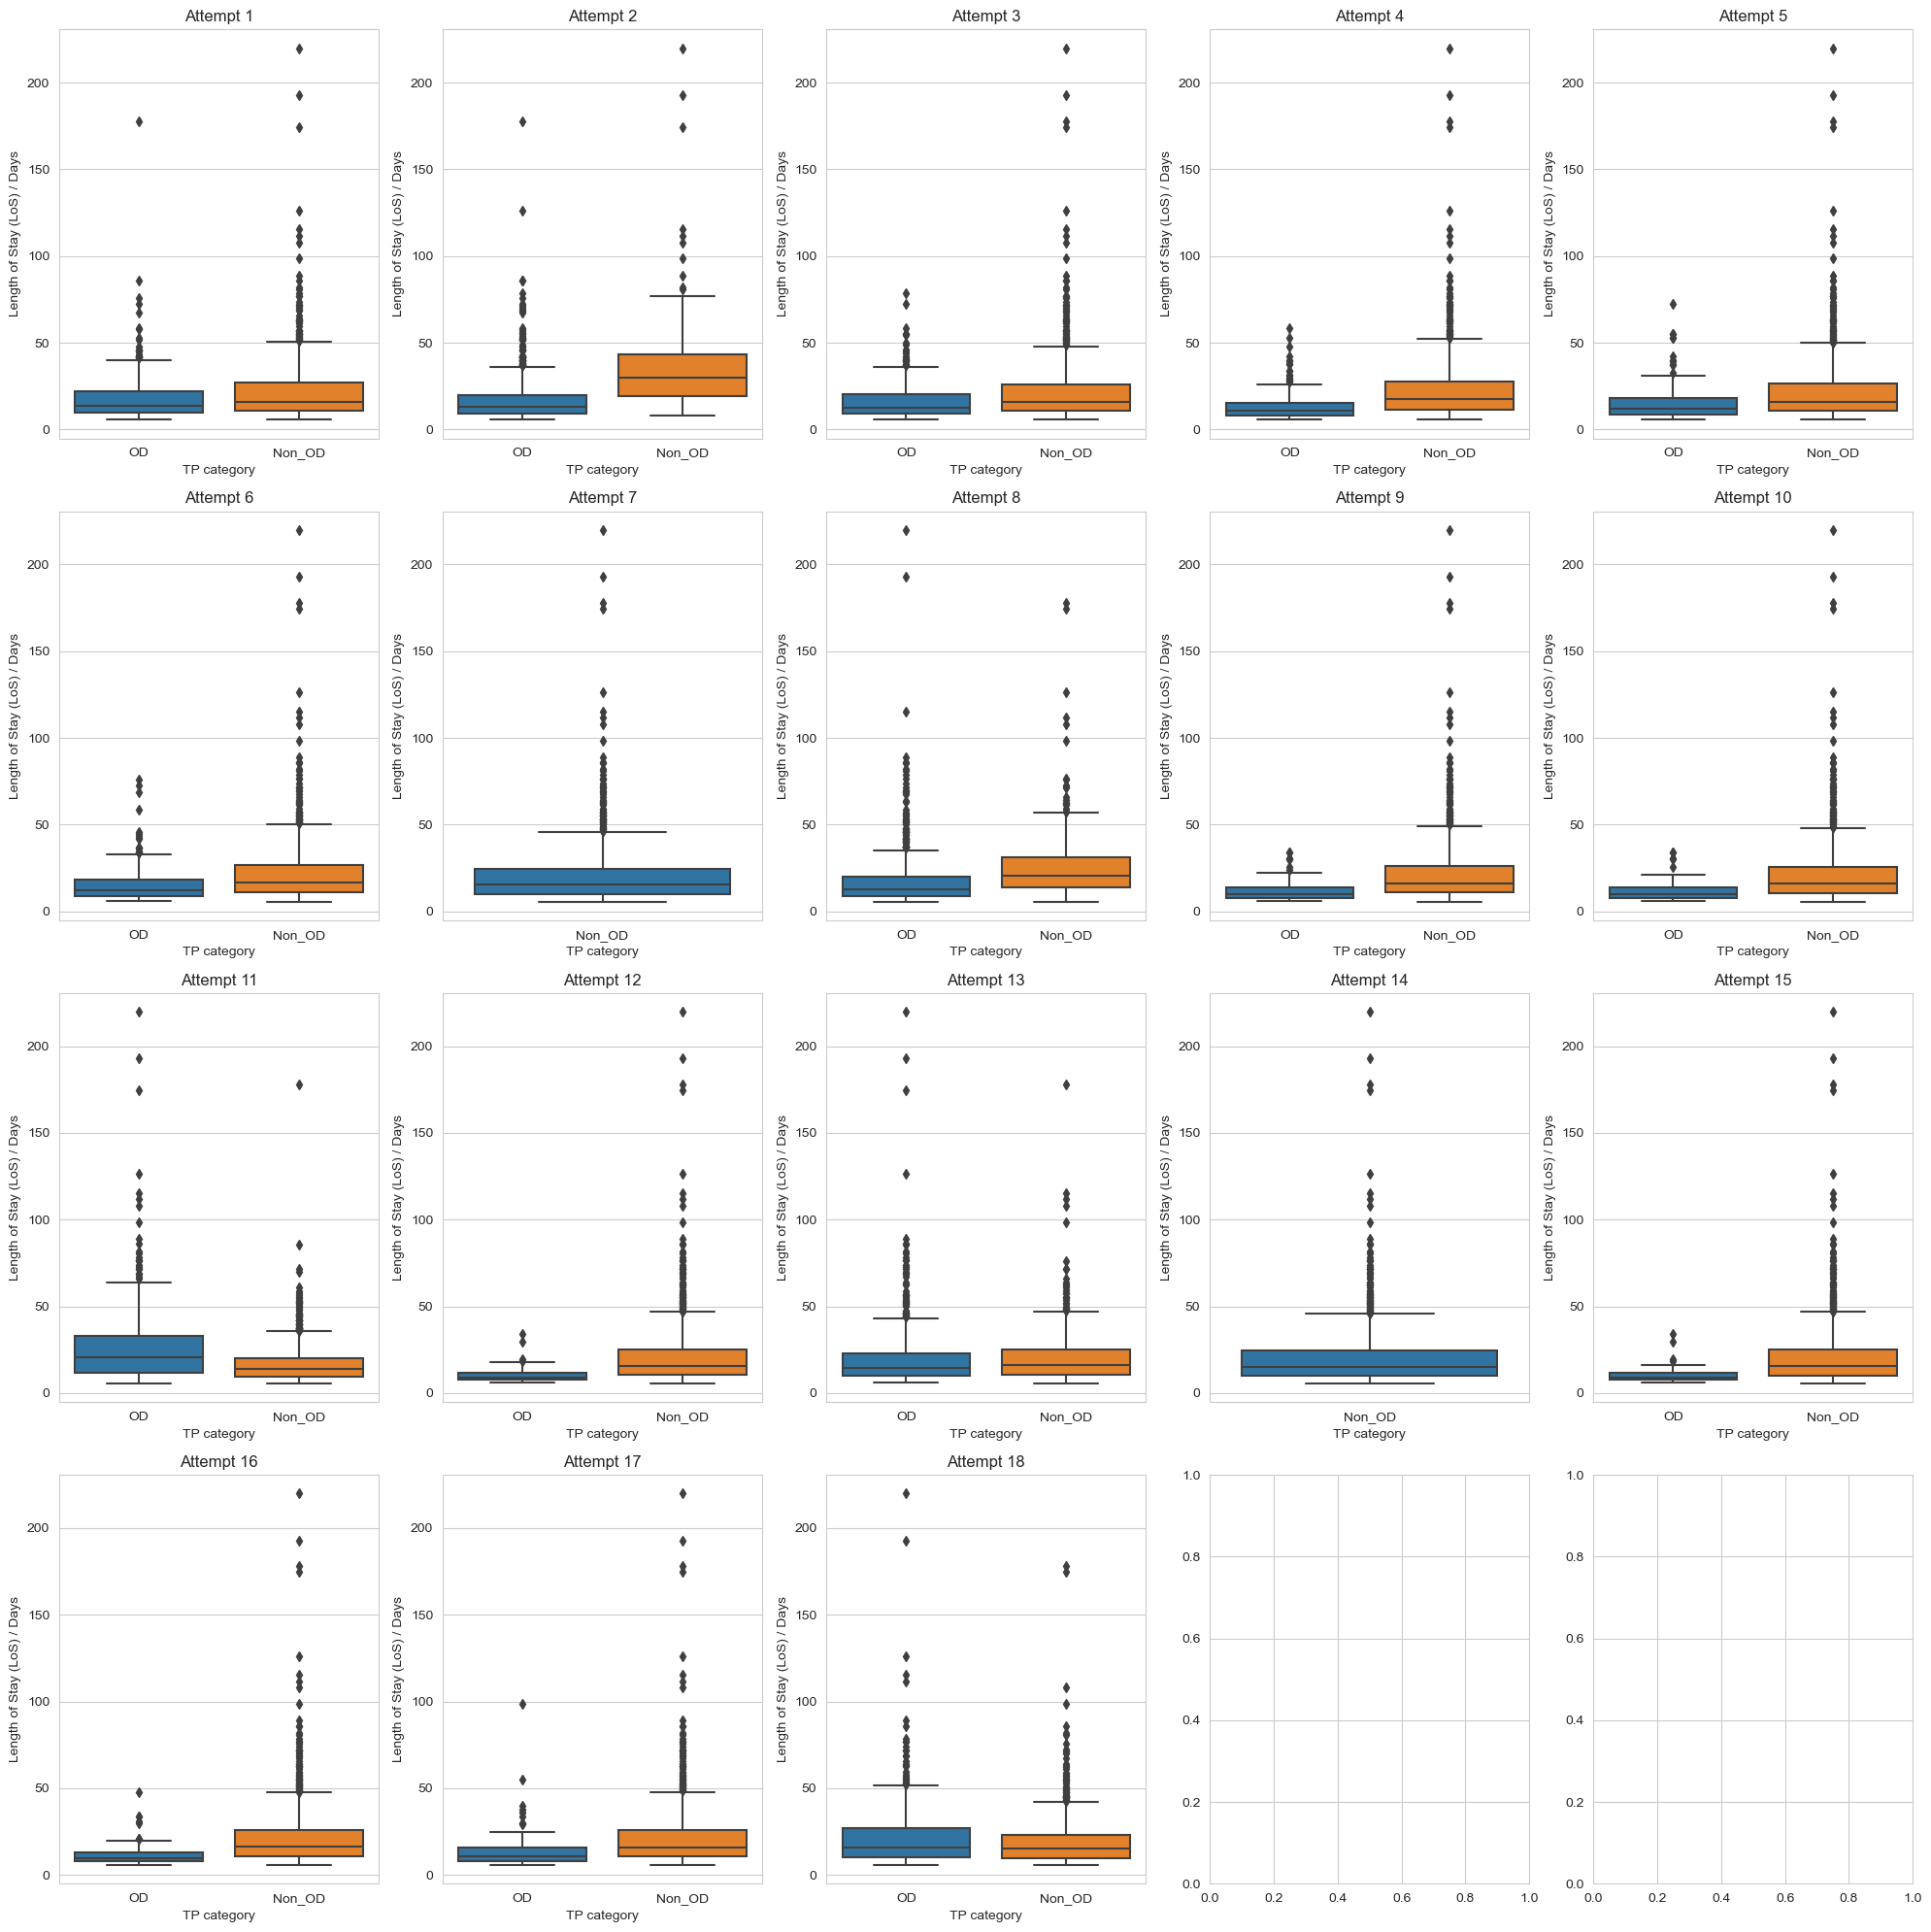

In [4]:
# Function to calculate Length of Stay (LoS)
def calculate_LoS(event_log_df):
    
    # Filter admission, discharge, and expire flag events

    admissions = event_log_df[event_log_df['event'] == 'admission']
    discharges = event_log_df[event_log_df['event'] == 'discharge']
    expire_flags = event_log_df[event_log_df['event'] == 'hospital_expire_flag_1']
    
    # Merge admission and discharge/expire times
    
    los_df = pd.merge(admissions[['hadm_id', 'event_time']], discharges[['hadm_id', 'event_time']], on='hadm_id', how='left', suffixes=('_admission', '_discharge'))
    los_df = pd.merge(los_df, expire_flags[['hadm_id', 'event_time']], on='hadm_id', how='left')
    los_df.rename(columns={'event_time': 'event_time_expire'}, inplace=True)
    los_df['event_time_actual_discharge'] = los_df['event_time_expire'].combine_first(los_df['event_time_discharge'])
    los_df['LoS'] = (los_df['event_time_actual_discharge'] - los_df['event_time_admission']).dt.total_seconds() / 86400
    return los_df[['hadm_id', 'LoS']]

# Load the full event log with admission and discharge times
event_log_full_with_adm_and_dischge = pd.read_csv('/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Input/Input_for_clustering/May15_v1.csv')
event_log_full_with_adm_and_dischge['event_time'] = pd.to_datetime(event_log_full_with_adm_and_dischge['event_time'])

# Plotting
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
#fig, axes = plt.subplots(4, 4, figsize=(20, 20))

axes = axes.flatten()

# main programme

for i, attempt in enumerate(attempts):
    cluster_distribution_df = pd.read_csv(attempt['cluster_distribution'])
    clusters_in_hadmid_level_df = pd.read_csv(attempt['clusters_in_hadmid_level'])
    
    total_TN_count = cluster_distribution_df['TN_count'].sum()
    total_TP_count = cluster_distribution_df['TP_count'].sum()
    total_patient_count = cluster_distribution_df['patient_count'].sum()
    
    overall_positive_ratio = total_TP_count / total_patient_count
    overall_negative_ratio = total_TN_count / total_patient_count
    TP_to_TN_ratio = total_TP_count / total_TN_count
    
    chi_squared_results_df = perform_chi_squared_test(cluster_distribution_df, overall_positive_ratio, overall_negative_ratio, TP_to_TN_ratio)
    
    # Return event log of TP cases only
    
    # Call the function
    
    event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)

    # Return LoS of each TP patient 
    LoS_TP_only = calculate_LoS(event_log_TP_only_with_OD_and_Non_od_label)
    
    # Merge (performs an inner join by default. This means it will only include rows that have matching hadm_id values in both event_log_TP_only_with_OD_and_Non_od_label[['hadm_id', 'OD_or_Non_od']].drop_duplicates() and LoS_TP_only.) hadm_id and the status (either OD or Non-OD) of each TP case with corresponding LoS
    
    merged_cluster_with_LoS_with_OD_and_Non_od_label = pd.merge(event_log_TP_only_with_OD_and_Non_od_label[['hadm_id', 'OD_or_Non_od']].drop_duplicates(), LoS_TP_only, on='hadm_id')
    
    sns.boxplot(x='OD_or_Non_od', y='LoS', data=merged_cluster_with_LoS_with_OD_and_Non_od_label, ax=axes[i])
    axes[i].set_title(f'Attempt {i + 1}')
    axes[i].set_xlabel('TP category')
    axes[i].set_ylabel('Length of Stay (LoS) / Days')
    
    # check output stats
    print(i+1)
    print(merged_cluster_with_LoS_with_OD_and_Non_od_label.groupby('OD_or_Non_od')['LoS'].describe())

plt.tight_layout()
plt.show()

1
              count       mean        std      min        25%        50%  \
OD_or_Non_od                                                               
Non_OD        689.0  22.243166  20.343539  5.60000  10.642361  15.809028   
OD            364.0  17.951152  14.455834  5.59375   9.553993  13.778472   

                    75%         max  
OD_or_Non_od                         
Non_OD        26.852083  219.908333  
OD            21.801736  177.950694  
p-value for attempt 1: 0.0004
2
              count       mean        std       min        25%        50%  \
OD_or_Non_od                                                                
Non_OD        212.0  35.705618  27.383815  7.936806  19.515799  29.727431   
OD            841.0  16.991879  13.249448  5.593750   9.141667  13.336111   

                    75%         max  
OD_or_Non_od                         
Non_OD        43.239757  219.908333  
OD            20.061111  177.950694  
p-value for attempt 2: 0.0000
3
              co

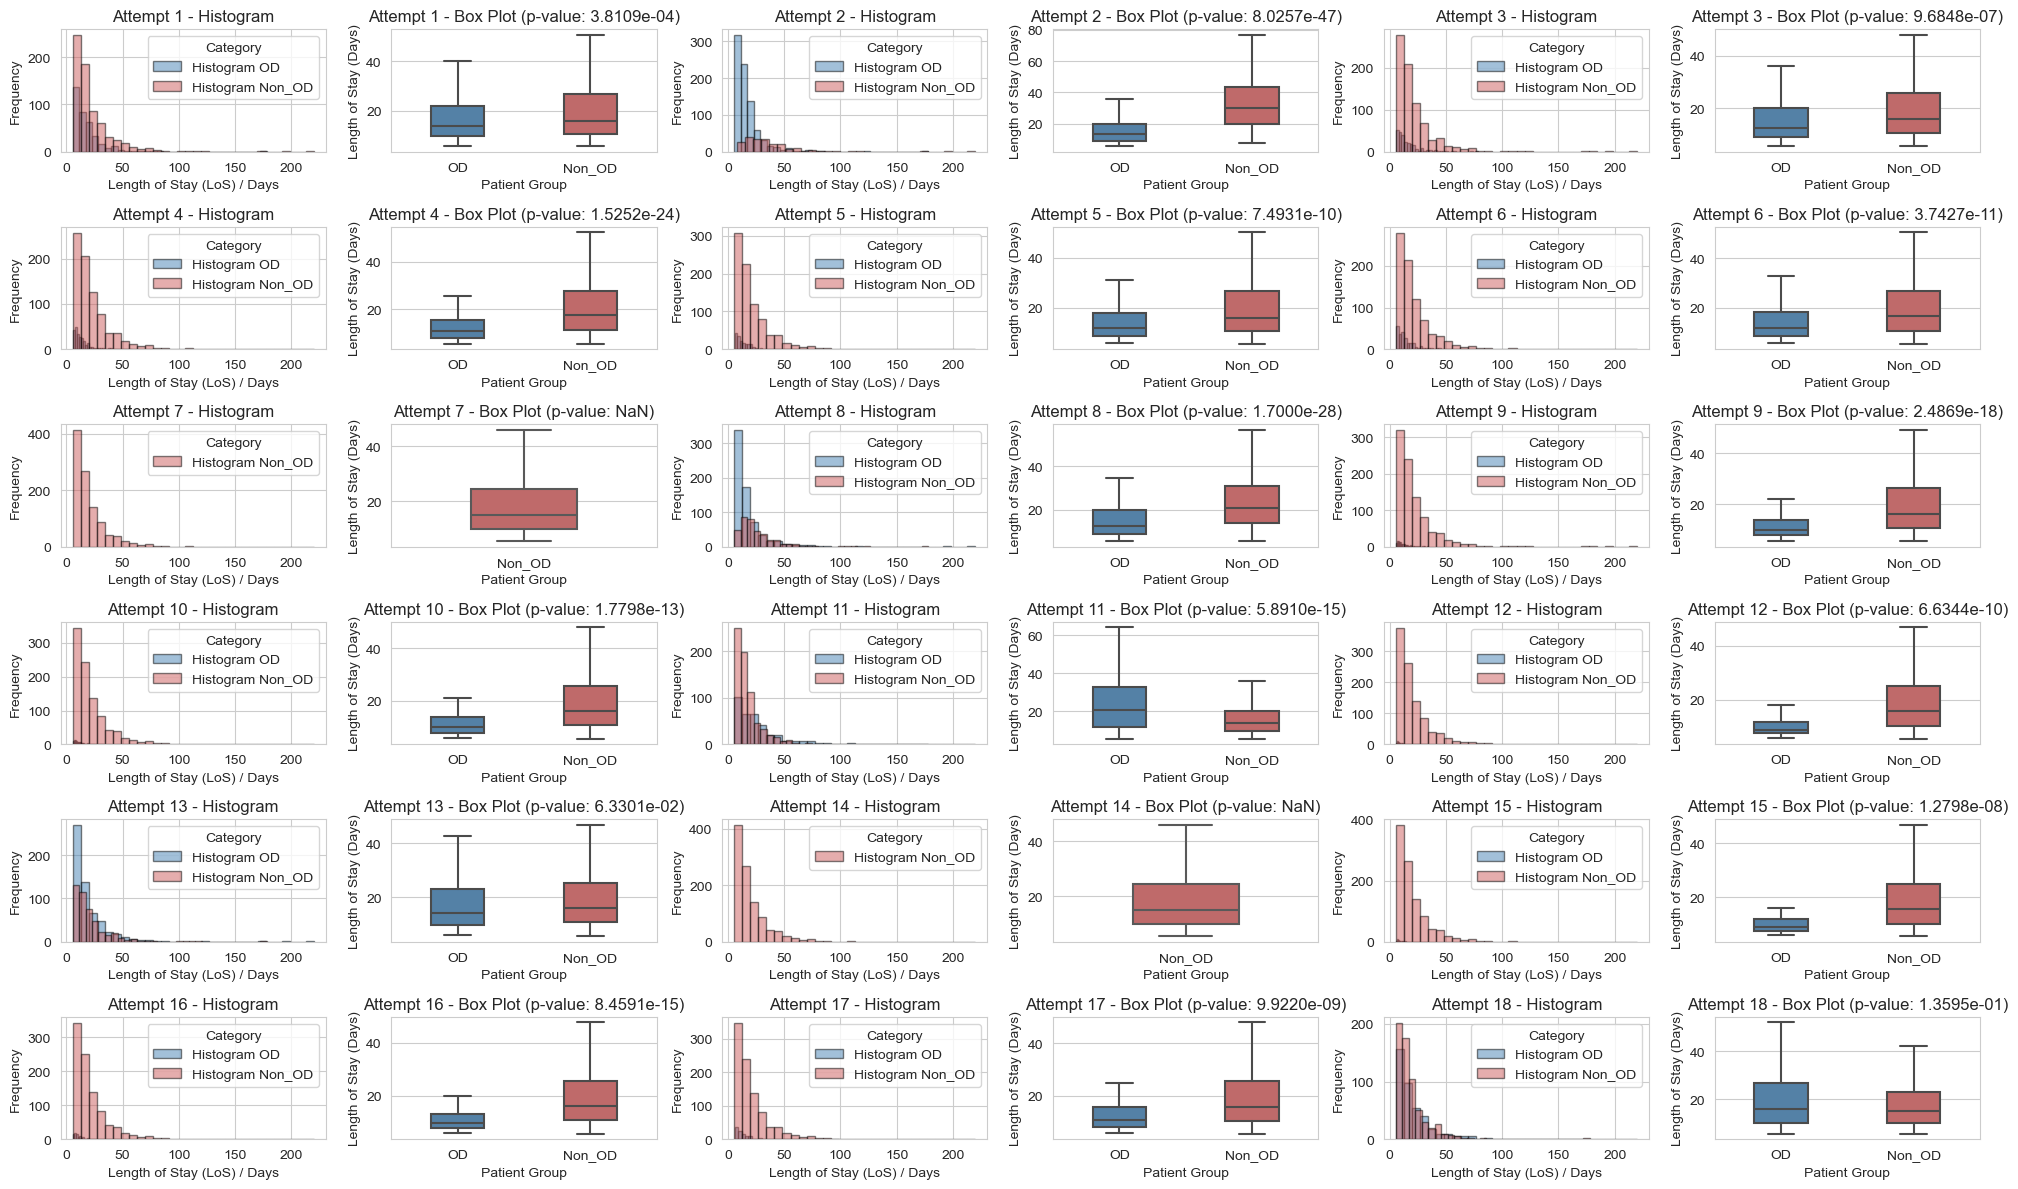

In [5]:
# box plot with histogram

# Function to calculate Length of Stay (LoS)
def calculate_LoS(event_log_df):
    admissions = event_log_df[event_log_df['event'] == 'admission']
    discharges = event_log_df[event_log_df['event'] == 'discharge']
    expire_flags = event_log_df[event_log_df['event'] == 'hospital_expire_flag_1']
    
    los_df = pd.merge(admissions[['hadm_id', 'event_time']], discharges[['hadm_id', 'event_time']], on='hadm_id', how='left', suffixes=('_admission', '_discharge'))
    los_df = pd.merge(los_df, expire_flags[['hadm_id', 'event_time']], on='hadm_id', how='left')
    los_df.rename(columns={'event_time': 'event_time_expire'}, inplace=True)
    los_df['event_time_actual_discharge'] = los_df['event_time_expire'].combine_first(los_df['event_time_discharge'])
    los_df['LoS'] = (los_df['event_time_actual_discharge'] - los_df['event_time_admission']).dt.total_seconds() / 86400
    return los_df[['hadm_id', 'LoS']]

# Load the full event log with admission and discharge times
event_log_full_with_adm_and_dischge = pd.read_csv('/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Input/Input_for_clustering/May15_v1.csv')
event_log_full_with_adm_and_dischge['event_time'] = pd.to_datetime(event_log_full_with_adm_and_dischge['event_time'])

# Plotting
#fig, axes = plt.subplots(9, 4, figsize=(20, 40))
fig, axes = plt.subplots(6, 6, figsize=(20, 12))
axes = axes.flatten()

# To store p-values
p_values_LoS = []

# Main program
for i, attempt in enumerate(attempts):
    cluster_distribution_df = pd.read_csv(attempt['cluster_distribution'])
    clusters_in_hadmid_level_df = pd.read_csv(attempt['clusters_in_hadmid_level'])
    
    total_TN_count = cluster_distribution_df['TN_count'].sum()
    total_TP_count = cluster_distribution_df['TP_count'].sum()
    total_patient_count = cluster_distribution_df['patient_count'].sum()
    
    overall_positive_ratio = total_TP_count / total_patient_count
    overall_negative_ratio = total_TN_count / total_patient_count
    TP_to_TN_ratio = total_TP_count / total_TN_count
    
    chi_squared_results_df = perform_chi_squared_test(cluster_distribution_df, overall_positive_ratio, overall_negative_ratio, TP_to_TN_ratio)
    
    event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)
    
    LoS_TP_only = calculate_LoS(event_log_TP_only_with_OD_and_Non_od_label)
    
    merged_cluster_with_LoS_with_OD_and_Non_od_label = pd.merge(event_log_TP_only_with_OD_and_Non_od_label[['hadm_id', 'OD_or_Non_od']].drop_duplicates(), LoS_TP_only, on='hadm_id')
    
    # Plot the histogram
    categories = merged_cluster_with_LoS_with_OD_and_Non_od_label['OD_or_Non_od'].unique()
    ax_hist = axes[i * 2]
    for category in categories:
        subset = merged_cluster_with_LoS_with_OD_and_Non_od_label[merged_cluster_with_LoS_with_OD_and_Non_od_label['OD_or_Non_od'] == category]
        color = '#CD5C5C' if category == 'Non_OD' else '#4682B4'
        ax_hist.hist(subset['LoS'], bins=30, alpha=0.5, label=f'Histogram {category}', edgecolor='black', color=color)
    ax_hist.set_title(f'Attempt {i + 1} - Histogram')
    ax_hist.set_xlabel('Length of Stay (LoS) / Days')
    ax_hist.set_ylabel('Frequency')
    ax_hist.legend(title='Category')
    
    # Plot the box plot
    ax_box = axes[i * 2 + 1]
    #sns.boxplot(x='OD_or_Non_od', y='LoS', data=merged_cluster_with_LoS_with_OD_and_Non_od_label, ax=ax_box, palette={'Non_OD': 'blue', 'OD': 'red'}, width=0.4, showfliers=False)
    sns.boxplot(x='OD_or_Non_od', y='LoS', data=merged_cluster_with_LoS_with_OD_and_Non_od_label, ax=ax_box, palette={'Non_OD': '#CD5C5C', 'OD': '#4682B4'}, width=0.4, showfliers=False)
    ax_box.set_title(f'Attempt {i + 1} - Box Plot')
    ax_box.set_xlabel('Patient Group')
    ax_box.set_ylabel('Length of Stay (Days)')
    
    # compare samples
    data_OD = merged_cluster_with_LoS_with_OD_and_Non_od_label[merged_cluster_with_LoS_with_OD_and_Non_od_label['OD_or_Non_od'] == 'OD']['LoS'].to_numpy()
    data_NonOD = merged_cluster_with_LoS_with_OD_and_Non_od_label[merged_cluster_with_LoS_with_OD_and_Non_od_label['OD_or_Non_od'] == 'Non_OD']['LoS'].to_numpy()

    if data_OD.size == 0 or data_NonOD.size == 0:
        p_val_LoS = np.nan
    else:
        stat, p_val_LoS = mannwhitneyu(data_OD, data_NonOD)
        
    # Add p-value to the box plot title
    # ax_box.set_title(f'Attempt {i + 1} - Box Plot (p-value: {p_val:.10f})' if not np.isnan(p_val) else f'Attempt {i + 1} - Box Plot (p-value: NaN)')

    ax_box.set_title(f'Attempt {i + 1} - Box Plot (p-value: {p_val_LoS:.4e})' if not np.isnan(p_val_LoS) else f'Attempt {i + 1} - Box Plot (p-value: NaN)')
  
    # Collect p-value
    p_values_LoS.append((i + 1, p_val_LoS))

    # check output stats
    print(i+1)
    print(merged_cluster_with_LoS_with_OD_and_Non_od_label.groupby('OD_or_Non_od')['LoS'].describe())
    print(f'p-value for attempt {i + 1}: {p_val_LoS:.4f}' if not np.isnan(p_val_LoS) else f'p-value for attempt {i + 1}: NaN')


# Create DataFrame with attempt numbers and p-values
p_values_LoS_df = pd.DataFrame(p_values_LoS, columns=['i', 'p_val_LoS'])
print(p_values_LoS_df)

plt.tight_layout()
plt.show()


### Thrombotic events

1
364 689
279 547
['OD', 'Non_OD'] [76.64835164835165, 79.39042089985486]
0.34196192672350734
2
841 212
632 194
['OD', 'Non_OD'] [75.1486325802616, 91.50943396226415]
3.7034704033753875e-07
3
266 787
195 631
['OD', 'Non_OD'] [73.30827067669173, 80.17789072426937]
0.023255807090014086
4
252 801
149 677
['OD', 'Non_OD'] [59.12698412698413, 84.51935081148564]
2.639879938254409e-17
5
187 866
125 701
['OD', 'Non_OD'] [66.84491978609626, 80.94688221709006]
3.256993829664412e-05
6
241 812
157 669
['OD', 'Non_OD'] [65.14522821576763, 82.38916256157636]
1.8298835170635642e-08
7
0 1053
0 826
['OD', 'Non_OD'] [0, 78.44254510921178]
nan
8
682 371
494 332
['OD', 'Non_OD'] [72.43401759530792, 89.4878706199461]
2.1516201346300458e-10
9
135 918
61 765
['OD', 'Non_OD'] [45.18518518518518, 83.33333333333334]
2.472277096416277e-23
10
100 953
50 776
['OD', 'Non_OD'] [50.0, 81.4270724029381]
9.155131567917149e-13
11
356 697
305 521
['OD', 'Non_OD'] [85.67415730337079, 74.74892395982783]
6.357539316609815e-

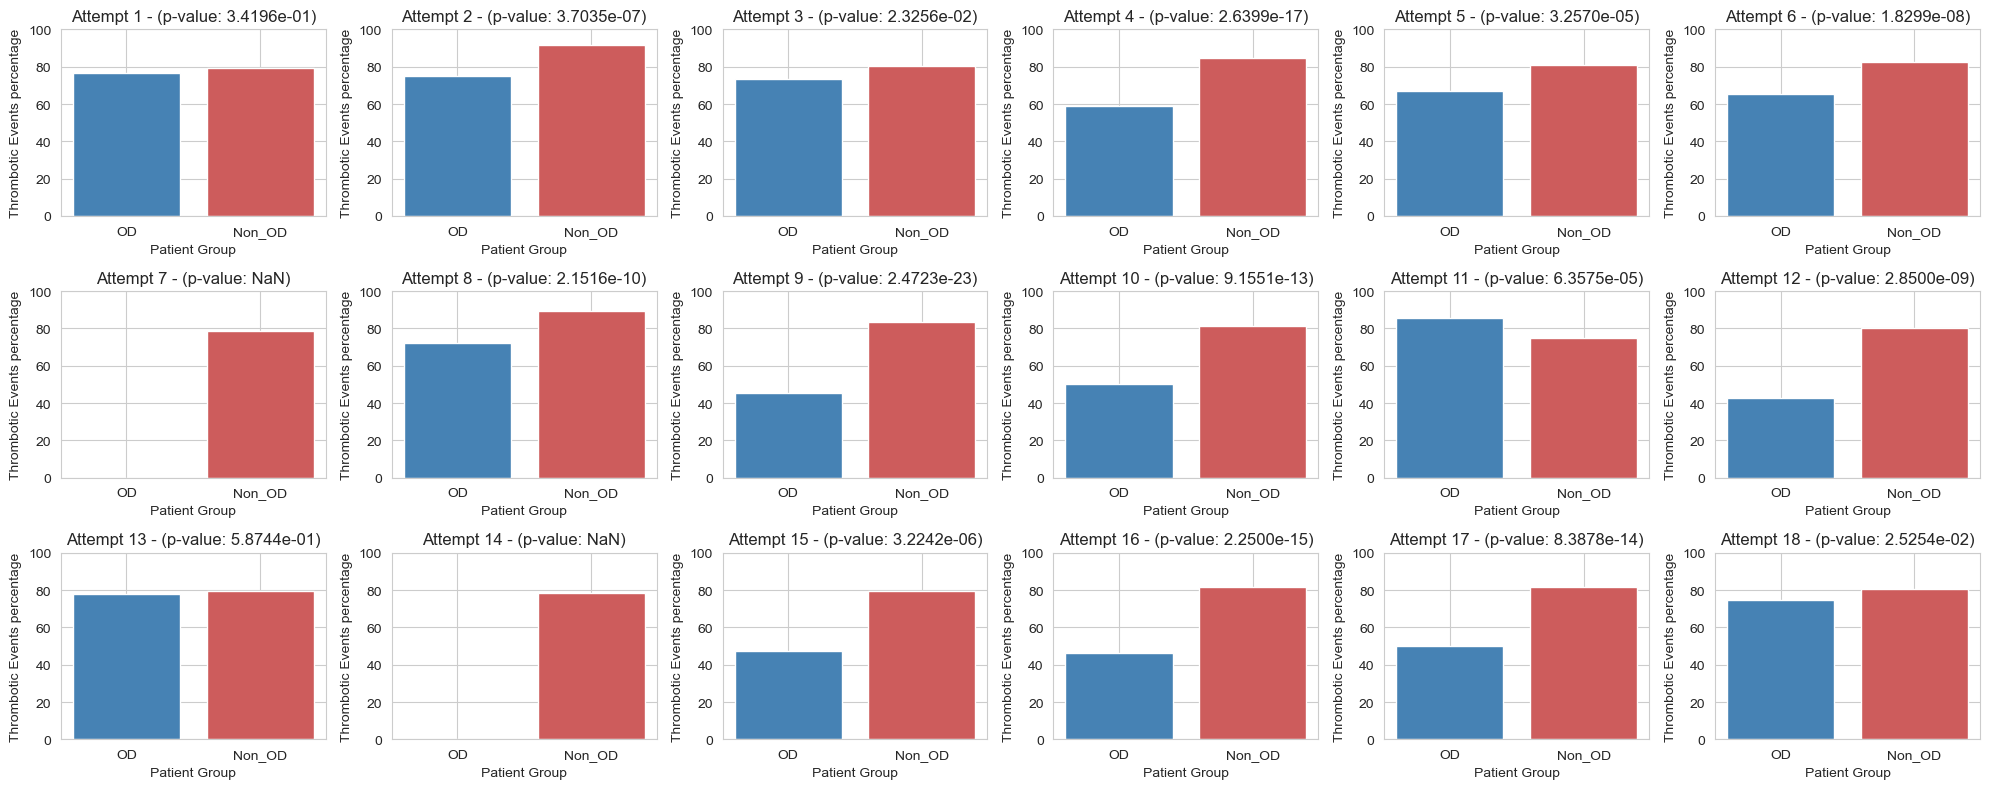

In [20]:
# Function to calculate Length of Stay (LoS)
def Thrombotic_events_percentages(event_log_df, OD_patients_count, Non_OD_patients_count):
    
    # How many OD patients had thrombotic events?
    Thrombotic_events_in_OD_patients = event_log_df[(event_log_df['event']=='First_Thrombosis_or_Embolism') & (event_log_df['OD_or_Non_od']=='OD')]['hadm_id'].nunique() 

    # How many Non-OD patients had thrombotic events?
    Thrombotic_events_in_Non_od_patients = event_log_df[(event_log_df['event']=='First_Thrombosis_or_Embolism') & (event_log_df['OD_or_Non_od']=='Non_OD')]['hadm_id'].nunique()  
    
    # percentages

    # OD_patients_percentage_with_thrombotic_events is set to zero if OD_patients_count is zero, preventing a ZeroDivisionError. Similarly, it also handles the case where Non_OD_patients_count is zero.
    
    OD_patients_percentage_with_thrombotic_events = (Thrombotic_events_in_OD_patients / OD_patients_count * 100) if OD_patients_count != 0 else 0

    Non_OD_patients_percentage_with_thrombotic_events = (Thrombotic_events_in_Non_od_patients / Non_OD_patients_count *100) if Non_OD_patients_count != 0 else 0
    
    No_thrombotic_events_in_OD_patients = OD_patients_count - Thrombotic_events_in_OD_patients
    
    No_thrombotic_events_in_Non_od_patients = Non_OD_patients_count - Thrombotic_events_in_Non_od_patients

    x = ['OD' , 'Non_OD']
    y = [OD_patients_percentage_with_thrombotic_events , Non_OD_patients_percentage_with_thrombotic_events]

    return x, y, Thrombotic_events_in_OD_patients, Thrombotic_events_in_Non_od_patients, No_thrombotic_events_in_OD_patients, No_thrombotic_events_in_Non_od_patients
    

# Plotting - blank figure
#fig, axes = plt.subplots(5, 4, figsize=(20, 20))
fig, axes = plt.subplots(3, 6, figsize=(20, 8))
axes = axes.flatten()

# main programme

p_values_thrombotic = []

for i, attempt in enumerate(attempts):
    cluster_distribution_df = pd.read_csv(attempt['cluster_distribution'])
    clusters_in_hadmid_level_df = pd.read_csv(attempt['clusters_in_hadmid_level'])
    
    total_TN_count = cluster_distribution_df['TN_count'].sum()
    total_TP_count = cluster_distribution_df['TP_count'].sum()
    total_patient_count = cluster_distribution_df['patient_count'].sum()
    
    overall_positive_ratio = total_TP_count / total_patient_count
    overall_negative_ratio = total_TN_count / total_patient_count
    TP_to_TN_ratio = total_TP_count / total_TN_count
    
    chi_squared_results_df = perform_chi_squared_test(cluster_distribution_df, overall_positive_ratio, overall_negative_ratio, TP_to_TN_ratio)
    
    # Return event log of TP cases only - Call the function
    event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)
    
    #event_log_TP_only_with_OD_and_Non_od_label = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)
    
    # Return LoS of each TP patient 
    X, Y, Thrombotic_events_in_OD_patients, Thrombotic_events_in_Non_od_patients, No_thrombotic_events_in_OD_patients, No_thrombotic_events_in_Non_od_patients = Thrombotic_events_percentages(event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count)
    
    print(i+1)
    print(OD_patients_count, Non_OD_patients_count)
    print(Thrombotic_events_in_OD_patients, Thrombotic_events_in_Non_od_patients)
    print(X, Y)
    
    #############
    # check p-values using chi-squared
    
    OD_Thrombotic_Yes = Thrombotic_events_in_OD_patients
    OD_Thrombotic_No = No_thrombotic_events_in_OD_patients
    NonOD_Thrombotic_Yes = Thrombotic_events_in_Non_od_patients
    NonOD_Thrombotic_No = No_thrombotic_events_in_Non_od_patients
    
    table = np.array([[OD_Thrombotic_Yes, OD_Thrombotic_No], [NonOD_Thrombotic_Yes, NonOD_Thrombotic_No]])

    if OD_Thrombotic_Yes == 0 or NonOD_Thrombotic_Yes == 0:
        p_val_thrombotic_events = np.nan
    else:
        stat_thrombotic_events, p_val_thrombotic_events, dof_thrombotic_events, expected_thrombotic_events = chi2_contingency(table)
    print(p_val_thrombotic_events)
    #############

    # Collect p-value
    p_values_thrombotic.append((i + 1, p_val_thrombotic_events))
    
    axes[i].bar(X, Y, color=['#4682B4', '#CD5C5C'])#, width = 0.4)
    axes[i].set_ylim(0, 100)
    
    axes[i].set_title(f'Attempt {i + 1} - (p-value: {p_val_thrombotic_events:.4e})' if not np.isnan(p_val_thrombotic_events) else f'Attempt {i + 1} - (p-value: NaN)')
    axes[i].set_xlabel('Patient Group')
    axes[i].set_ylabel('Thrombotic Events percentage')

# Create DataFrame with attempt numbers and p-values
p_values_thrombotic_events = pd.DataFrame(p_values_thrombotic, columns=['i', 'p_val_thrombotic_events'])
print(p_values_thrombotic_events)

plt.tight_layout()
plt.show()


### Mortality rates

1
364 689
85 151
['OD', 'Non_OD'] [23.35164835164835, 21.91582002902758]
0.6500503534705844
2
841 212
181 55
['OD', 'Non_OD'] [21.521997621878715, 25.943396226415093]
0.19791466989218967
3
266 787
38 198
['OD', 'Non_OD'] [14.285714285714285, 25.158831003811944]
0.00032888453439756444
4
252 801
16 220
['OD', 'Non_OD'] [6.349206349206349, 27.465667915106117]
4.375912957442523e-12
5
187 866
41 195
['OD', 'Non_OD'] [21.92513368983957, 22.51732101616628]
0.936695123272558
6
241 812
15 221
['OD', 'Non_OD'] [6.224066390041494, 27.216748768472904]
1.2453557127156869e-11
7
0 1053
0 236
['OD', 'Non_OD'] [0, 22.41215574548908]
nan
8
682 371
132 104
['OD', 'Non_OD'] [19.35483870967742, 28.03234501347709]
0.0016420700158075391
9
135 918
8 228
['OD', 'Non_OD'] [5.9259259259259265, 24.836601307189543]
1.5152123581898718e-06
10
100 953
6 230
['OD', 'Non_OD'] [6.0, 24.134312696747116]
6.044925363781066e-05
11
356 697
88 148
['OD', 'Non_OD'] [24.719101123595504, 21.233859397417504]
0.2282515362129406
12

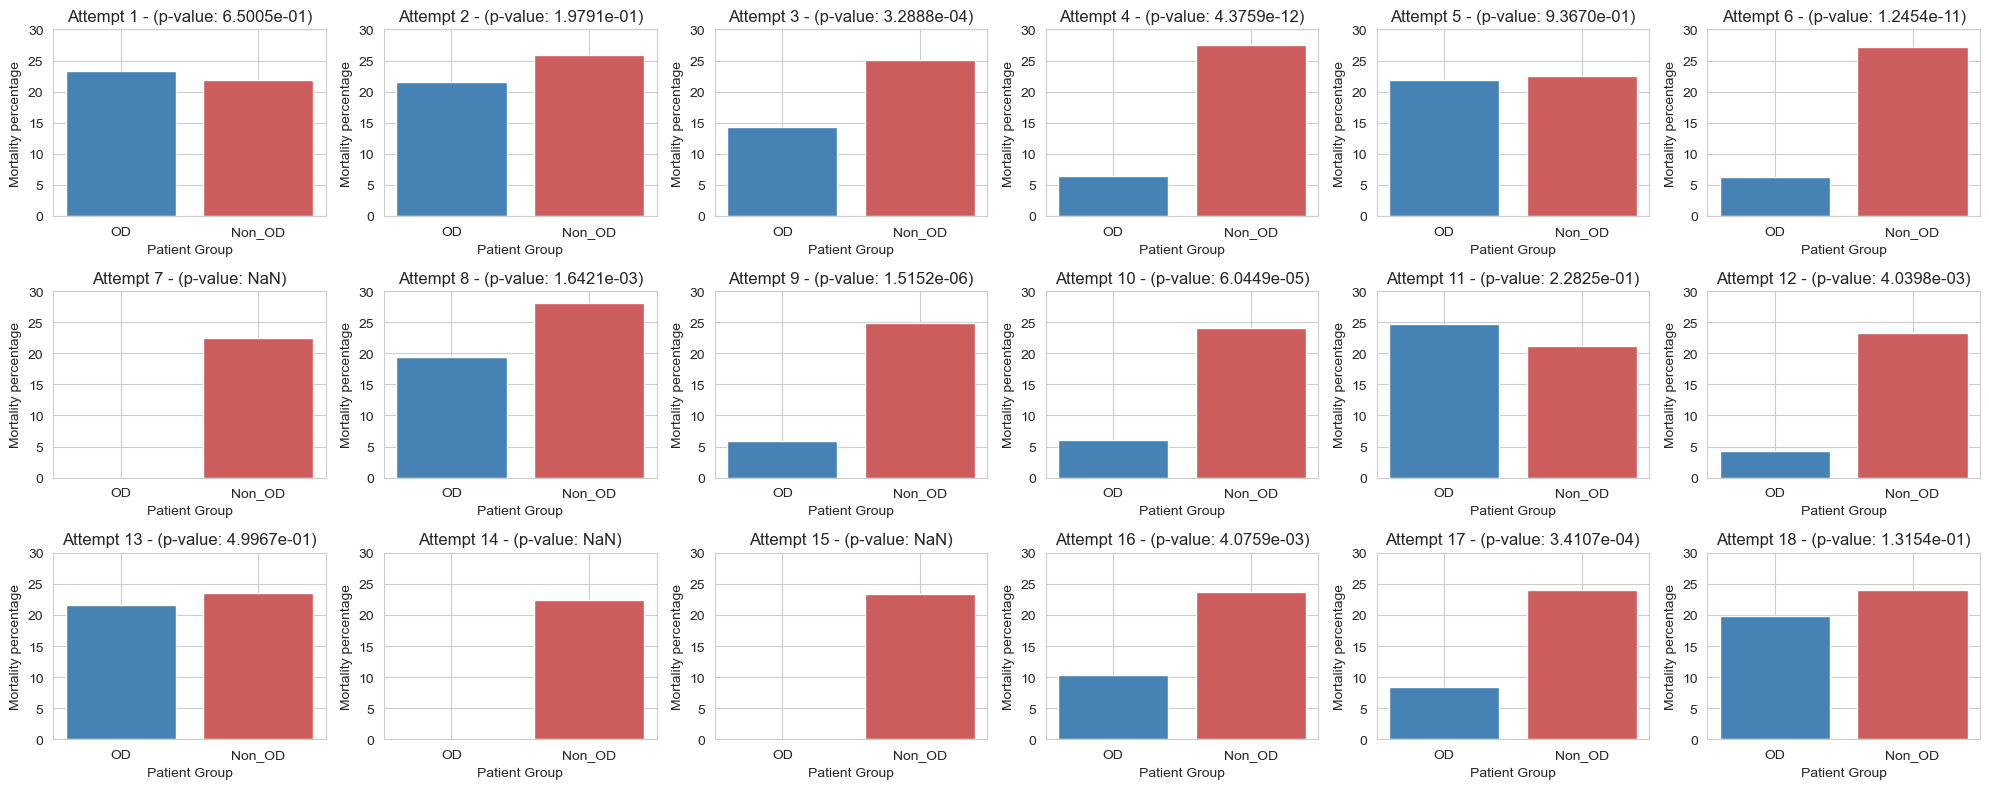

In [21]:
# Function to calculate Length of Stay (LoS)
def Mortality_rates_percentages(event_log_df, OD_patients_count, Non_OD_patients_count):
    
    # How many OD patients had Mortality events?
    Mortality_in_OD_patients = event_log_df[(event_log_df['event']=='hospital_expire_flag_1') & (event_log_df['OD_or_Non_od']=='OD')]['hadm_id'].nunique() 

    # How many Non-OD patients had Mortality events?
    Mortality_in_Non_od_patients = event_log_df[(event_log_df['event']=='hospital_expire_flag_1') & (event_log_df['OD_or_Non_od']=='Non_OD')]['hadm_id'].nunique()  
    
    # percentages

    # OD_patients_percentage_with_throMortalitymbotic_events is set to zero if OD_patients_count is zero, preventing a ZeroDivisionError. Similarly, it also handles the case where Non_OD_patients_count is zero.
    
    OD_patients_percentage_with_Mortality = (Mortality_in_OD_patients / OD_patients_count * 100) if OD_patients_count != 0 else 0

    Non_OD_patients_percentage_with_Mortality = (Mortality_in_Non_od_patients / Non_OD_patients_count *100) if Non_OD_patients_count != 0 else 0
    
    No_Mortality_in_OD_patients = OD_patients_count - Mortality_in_OD_patients
    
    No_Mortality_in_Non_od_patients = Non_OD_patients_count - Mortality_in_Non_od_patients
    
    x = ['OD' , 'Non_OD']
    y = [OD_patients_percentage_with_Mortality , Non_OD_patients_percentage_with_Mortality]

    return x, y, Mortality_in_OD_patients, Mortality_in_Non_od_patients, No_Mortality_in_OD_patients, No_Mortality_in_Non_od_patients
    

# Plotting
#fig, axes = plt.subplots(5, 4, figsize=(20, 20))
fig, axes = plt.subplots(3, 6, figsize=(20, 8))
axes = axes.flatten()

p_values_Mortality =[]

# main programme

for i, attempt in enumerate(attempts):
    cluster_distribution_df = pd.read_csv(attempt['cluster_distribution'])
    clusters_in_hadmid_level_df = pd.read_csv(attempt['clusters_in_hadmid_level'])
    
    total_TN_count = cluster_distribution_df['TN_count'].sum()
    total_TP_count = cluster_distribution_df['TP_count'].sum()
    total_patient_count = cluster_distribution_df['patient_count'].sum()
    
    overall_positive_ratio = total_TP_count / total_patient_count
    overall_negative_ratio = total_TN_count / total_patient_count
    TP_to_TN_ratio = total_TP_count / total_TN_count
    
    chi_squared_results_df = perform_chi_squared_test(cluster_distribution_df, overall_positive_ratio, overall_negative_ratio, TP_to_TN_ratio)
    
    # Return event log of TP cases only - Call the function
    event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)
    
    #event_log_TP_only_with_OD_and_Non_od_label = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)
    
    # Return LoS of each TP patient 
    X, Y, Mortality_in_OD_patients, Mortality_in_Non_od_patients, No_Mortality_in_OD_patients, No_Mortality_in_Non_od_patients = Mortality_rates_percentages(event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count)

    print(i+1)
    print(OD_patients_count, Non_OD_patients_count)
    print(Mortality_in_OD_patients, Mortality_in_Non_od_patients)
    print(X, Y)

    # check p-values using chi-squared
    
    OD_Mortality_Yes = Mortality_in_OD_patients
    OD_Mortality_No = No_Mortality_in_OD_patients
    NonOD_Mortality_Yes = Mortality_in_Non_od_patients
    NonOD_Mortality_No = No_Mortality_in_Non_od_patients
    
    Contingency_table_Mortality = np.array([[OD_Mortality_Yes, OD_Mortality_No], [NonOD_Mortality_Yes, NonOD_Mortality_No]])

    if OD_Mortality_Yes == 0 or NonOD_Mortality_Yes == 0:
        p_val_Mortality = np.nan
    else:
        stat_thrombotic_events, p_val_Mortality, dof_thrombotic_events, expected_thrombotic_events = chi2_contingency(Contingency_table_Mortality)
    print(p_val_Mortality)

    p_values_Mortality.append((i + 1, p_val_Mortality))
    
    
    axes[i].bar(X, Y, color=['#4682B4', '#CD5C5C'])#, width = 0.4)
    axes[i].set_ylim(0, 30)
    axes[i].set_title(f'Attempt {i + 1} - (p-value: {p_val_Mortality:.4e})' if not np.isnan(p_val_Mortality) else f'Attempt {i + 1} - (p-value: NaN)')
    axes[i].set_xlabel('Patient Group')
    axes[i].set_ylabel('Mortality percentage')
    
# Create DataFrame with attempt numbers and p-values
p_values_Mortality_df = pd.DataFrame(p_values_Mortality, columns=['i', 'p_val_Mortality'])
print(p_values_Mortality_df)

plt.tight_layout()
plt.show()



### concat p-values of all three clinical parameters - LoS / Thrombotic events / Mortality

In [10]:
# merge p-values of all 3 clinical parameters in a one table and safe it as a csv file.

p_values_merge_all = pd.merge(p_values_LoS_df, (pd.merge(p_values_thrombotic_events, p_values_Mortality_df, on='i', how='outer')), on='i', how='outer')

p_values_merge_all_csv_path = '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/p_values_merge_all_18_attempts.csv'

#p_values_merge_all.to_csv(p_values_merge_all_csv_path, index=False)

p_values_merge_all

,i,p_val_LoS,p_val_thrombotic_events,p_val_Mortality
0,1,3.810935e-04,3.419619e-01,6.500504e-01
1,2,8.025723e-47,3.703470e-07,1.979147e-01
2,3,9.684837e-07,2.325581e-02,3.288845e-04
3,4,1.525175e-24,2.639880e-17,4.375913e-12
4,5,7.493087e-10,3.256994e-05,9.366951e-01
5,6,3.742653e-11,1.829884e-08,1.245356e-11
6,7,NaN,NaN,NaN
7,8,1.700006e-28,2.151620e-10,1.642070e-03
8,9,2.486890e-18,2.472277e-23,1.515212e-06
9,10,1.779764e-13,9.155132e-13,6.044925e-05


In [23]:
# Set p_values (LoS) to np.nan if the value<0.05

p_values_LoS_df['p_val_LoS'] = np.where(p_values_LoS_df['p_val_LoS'] < 0.05, p_values_LoS_df['p_val_LoS'], np.nan)

# Set p_values (thrombotic_events) to np.nan if the value<0.05

p_values_thrombotic_events['p_val_thrombotic_events'] = np.where(p_values_thrombotic_events['p_val_thrombotic_events'] < 0.05, p_values_thrombotic_events['p_val_thrombotic_events'], np.nan)

# Set p_values (Mortality) to np.nan if the value<0.05

p_values_Mortality_df['p_val_Mortality'] = np.where(p_values_Mortality_df['p_val_Mortality'] < 0.05, p_values_Mortality_df['p_val_Mortality'], np.nan)

# Merge all three forms of p values - LoS / Thrombotic events / Mortality

p_values_all_LoS_Thrombotic_Mortality = pd.merge(p_values_LoS_df, p_values_thrombotic_events, on='i', how='outer')
p_values_all_LoS_Thrombotic_Mortality = pd.merge(p_values_all_LoS_Thrombotic_Mortality, p_values_Mortality_df, on='i', how='outer')

# Filter rows where all three forms of p_values are statistically significant (i.e., non of the values in the row should be np.NaN)

statistically_significant_rows_only = p_values_all_LoS_Thrombotic_Mortality.dropna(subset=['p_val_LoS', 'p_val_thrombotic_events', 'p_val_Mortality'])

statistically_significant_rows_only

,i,p_val_LoS,p_val_thrombotic_events,p_val_Mortality
2,3,9.684837e-07,2.325581e-02,3.288845e-04
3,4,1.525175e-24,2.639880e-17,4.375913e-12
5,6,3.742653e-11,1.829884e-08,1.245356e-11
7,8,1.700006e-28,2.151620e-10,1.642070e-03
8,9,2.486890e-18,2.472277e-23,1.515212e-06
9,10,1.779764e-13,9.155132e-13,6.044925e-05
11,12,6.634443e-10,2.850041e-09,4.039760e-03
15,16,8.459127e-15,2.249977e-15,4.075884e-03
16,17,9.922032e-09,8.387797e-14,3.410709e-04


In [24]:
# Sort each parameter column independently while keeping the corresponding 'i' values

# 1. Sort by P_values of LoS
statistically_significant_sorted_LoS_Pval = statistically_significant_rows_only[['i', 'p_val_LoS']].sort_values(by='p_val_LoS').reset_index(drop=True)

statistically_significant_sorted_LoS_Pval

,i,p_val_LoS
0,8,1.700006e-28
1,4,1.525175e-24
2,9,2.486890e-18
3,16,8.459127e-15
4,10,1.779764e-13
5,6,3.742653e-11
6,12,6.634443e-10
7,17,9.922032e-09
8,3,9.684837e-07


In [25]:
# 2. Sort by P_values of thrombotic_events
statistically_significant_sorted_Thrombotic_Pval = statistically_significant_rows_only[['i', 'p_val_thrombotic_events']].sort_values(by='p_val_thrombotic_events').reset_index(drop=True)

statistically_significant_sorted_Thrombotic_Pval

,i,p_val_thrombotic_events
0,9,2.472277e-23
1,4,2.639880e-17
2,16,2.249977e-15
3,17,8.387797e-14
4,10,9.155132e-13
5,8,2.151620e-10
6,12,2.850041e-09
7,6,1.829884e-08
8,3,2.325581e-02


In [26]:
# 3. Sort by P_values of Mortality
statistically_significant_sorted_Mortality_Pval = statistically_significant_rows_only[['i', 'p_val_Mortality']].sort_values(by='p_val_Mortality').reset_index(drop=True)

statistically_significant_sorted_Mortality_Pval

,i,p_val_Mortality
0,4,4.375913e-12
1,6,1.245356e-11
2,9,1.515212e-06
3,10,6.044925e-05
4,3,3.288845e-04
5,17,3.410709e-04
6,8,1.642070e-03
7,12,4.039760e-03
8,16,4.075884e-03


### check OD and Non-OD patient counts for each attempt of clustering

In [27]:
# Initialize an empty DataFrame with the specified columns
results_df = pd.DataFrame(columns=[
    'Attempt', 'TP_count', 'TN_count', 'cluster_count', 'OD_TP_count', 
    'Non_OD_TP_count', 'OD_percentage', 'Non_OD_percentage'
])

for i, attempt in enumerate(attempts):
    cluster_distribution_df = pd.read_csv(attempt['cluster_distribution'])
    clusters_in_hadmid_level_df = pd.read_csv(attempt['clusters_in_hadmid_level'])
    
    total_TN_count = cluster_distribution_df['TN_count'].sum()
    total_TP_count = cluster_distribution_df['TP_count'].sum()
    total_patient_count = cluster_distribution_df['patient_count'].sum()
    
    overall_positive_ratio = total_TP_count / total_patient_count
    overall_negative_ratio = total_TN_count / total_patient_count
    TP_to_TN_ratio = total_TP_count / total_TN_count
    
    chi_squared_results_df = perform_chi_squared_test(cluster_distribution_df, overall_positive_ratio, overall_negative_ratio, TP_to_TN_ratio)
    
    # number of clusters in each attempt
    
    cluster_count = (chi_squared_results_df['cluster_index'].max())+1
    
    # Return event log of TP cases only - Call the function
    event_log_TP_only_with_OD_and_Non_od_label, OD_patients_count, Non_OD_patients_count = label_OD_Non_OD_patients(clusters_in_hadmid_level_df, chi_squared_results_df, event_log_full_with_adm_and_dischge)

    OD_percentage = round((OD_patients_count / total_TP_count * 100), 2)
    Non_OD_percentage = round((Non_OD_patients_count / total_TP_count * 100), 2)
    
    # Create a DataFrame for the current attempt
    attempt_df = pd.DataFrame({
        'Attempt': [i + 1],
        'TP_count': [total_TP_count],
        'TN_count': [total_TN_count],
        'cluster_count': [cluster_count],
        'OD_TP_count': [OD_patients_count],
        'Non_OD_TP_count': [Non_OD_patients_count],
        
        'OD_percentage': [OD_percentage],
        'Non_OD_percentage': [Non_OD_percentage]
    })
    
    # Concatenate the current attempt DataFrame with the results DataFrame
    results_df = pd.concat([results_df, attempt_df], ignore_index=True)

# Display the results DataFrame
results_df.reset_index(drop=True)

# Save cluster data to a CSV file

clusters_hadmid_level_csv_path = '/Users/psenevirathn/Desktop/PhD/Coding/Trajectories/Results_from_HPC/full_results_only_with_TP_and_TN/June21_only_TP_and_TN/results_changing_parameters_16_attempts.csv'

#results_df.to_csv(clusters_hadmid_level_csv_path, index=False)

results_df

,Attempt,TP_count,TN_count,cluster_count,OD_TP_count,Non_OD_TP_count,OD_percentage,Non_OD_percentage
0,1,1053,11288,5,364,689,34.57,65.43
1,2,1053,11288,2,841,212,79.87,20.13
2,3,1053,11288,12,266,787,25.26,74.74
3,4,1053,11288,6,252,801,23.93,76.07
4,5,1053,11288,32,187,866,17.76,82.24
5,6,1053,11288,16,241,812,22.89,77.11
6,7,1053,11288,6,0,1053,0.00,100.00
7,8,1053,11288,3,682,371,64.77,35.23
8,9,1053,11288,13,135,918,12.82,87.18
9,10,1053,11288,10,100,953,9.50,90.50


### Test after sending the initial results